In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset
train = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")
                    

In [3]:
print('train-row,column:\n', train.shape)
print('test-row,column:\n', test.shape)
print('train-head:\n', train.head(3))
print('test-head:\n', test.head(3))

train-row,column:
 (1914, 35)
test-row,column:
 (821, 34)
train-head:
      Id  Age BusinessTravel  DailyRate              Department  \
0  2240   25  Travel_Rarely        883                   Sales   
1  2722   40  Travel_Rarely        896  Research & Development   
2  1090   49  Travel_Rarely        653  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                26          1        Medical              1   
1                 2          3        Medical              1   
2                 9          3  Life Sciences              1   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        3  ...            80                 0   
1                        3  ...            80                 1   
2                        2  ...            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  6                      5               2

In [4]:
# Explore further
print('Data-information:\n', train.info())
print('Data-description:\n', train.describe())
print('missing-data:\n',train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        1914 non-null   int64 
 1   Age                       1914 non-null   int64 
 2   BusinessTravel            1914 non-null   object
 3   DailyRate                 1914 non-null   int64 
 4   Department                1914 non-null   object
 5   DistanceFromHome          1914 non-null   int64 
 6   Education                 1914 non-null   int64 
 7   EducationField            1914 non-null   object
 8   EmployeeCount             1914 non-null   int64 
 9   EnvironmentSatisfaction   1914 non-null   int64 
 10  Gender                    1914 non-null   object
 11  HourlyRate                1914 non-null   int64 
 12  JobInvolvement            1914 non-null   int64 
 13  JobLevel                  1914 non-null   int64 
 14  JobRole                 

In [5]:
# EDA
#selecting numerical columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
#removing target
num_cols = [c for c in num_cols if c!= 'Attrition']
print(num_cols)

['Id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [6]:
# check for skewness for each nunerical column
skew_values = train[num_cols].skew().sort_values(ascending=False)
print(skew_values)

PerformanceRating           2.045460
YearsSinceLastPromotion     1.997917
YearsAtCompany              1.783806
MonthlyIncome               1.402207
TotalWorkingYears           1.136701
DistanceFromHome            1.103784
NumCompaniesWorked          1.071198
JobLevel                    1.068300
StockOptionLevel            1.015320
YearsInCurrentRole          0.908922
PercentSalaryHike           0.866063
YearsWithCurrManager        0.827407
TrainingTimesLastYear       0.527556
Age                         0.493559
EmployeeCount               0.000000
StandardHours               0.000000
Id                         -0.009090
MonthlyRate                -0.039108
HourlyRate                 -0.071874
DailyRate                  -0.154250
EnvironmentSatisfaction    -0.327940
RelationshipSatisfaction   -0.339905
Education                  -0.344072
JobSatisfaction            -0.379881
WorkLifeBalance            -0.570986
JobInvolvement             -0.588760
dtype: float64


In [7]:
#check for outlier using IQR method
outlier_summary = {}
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = train[(train[col] < lower)| (train[col] > upper)][col].count()
    outlier_summary[col] = outliers

pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['outliers'])

,outliers
Id,0
Age,0
DailyRate,0
DistanceFromHome,129
Education,0
EmployeeCount,0
EnvironmentSatisfaction,0
HourlyRate,0
JobInvolvement,0
JobLevel,1


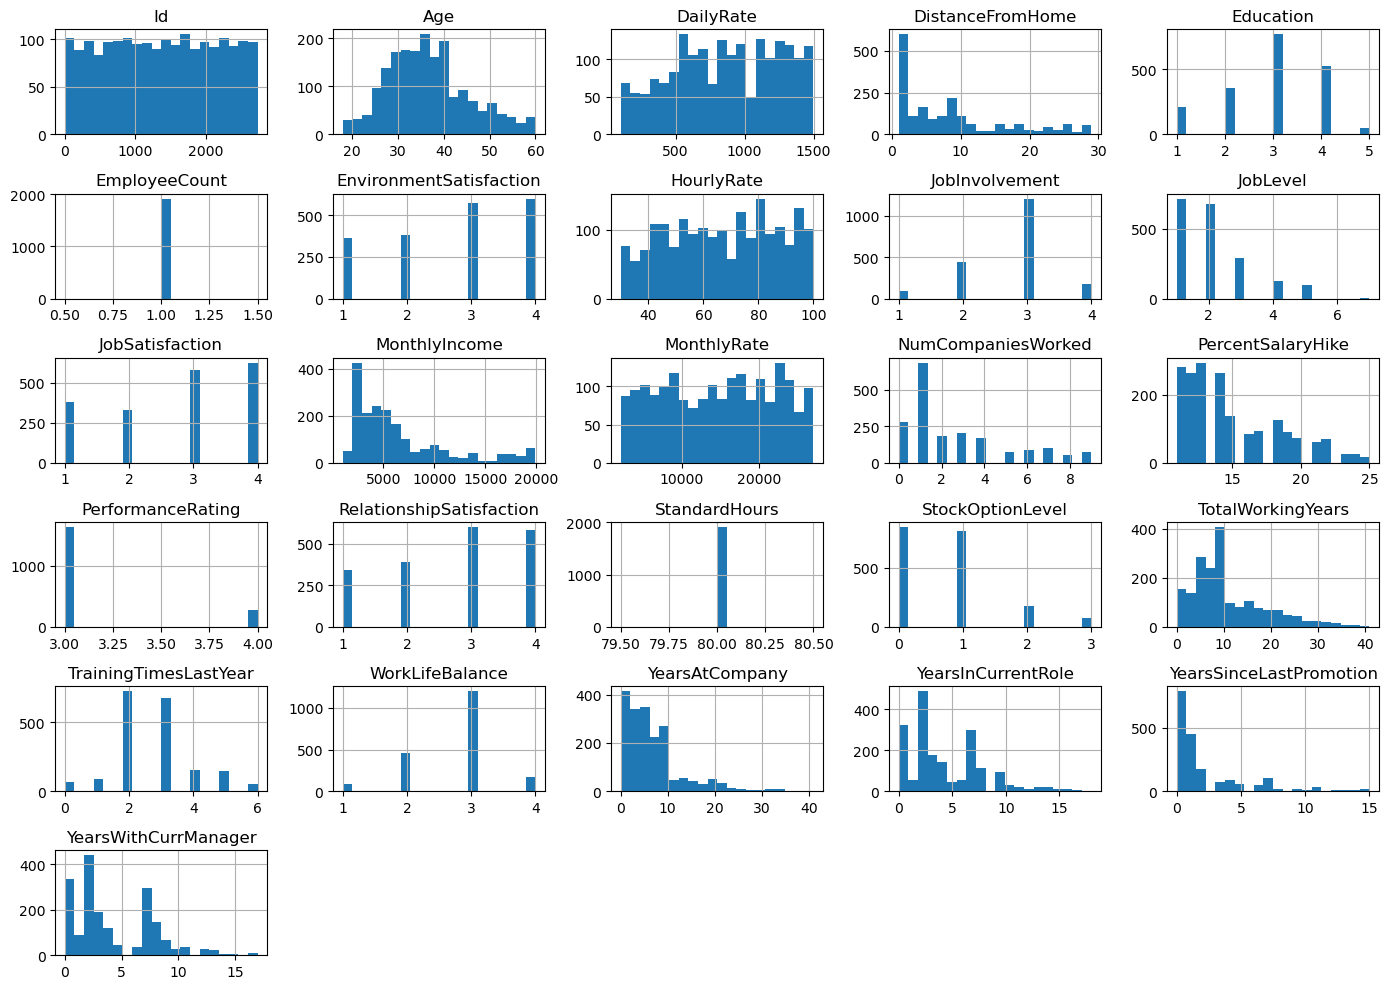

In [8]:
# visualizing skewness with histogram
train[num_cols].hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

In [9]:
#selecting catigorical columns
cat_cols = train.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [10]:
# compute attrition rate for each category

attrition_rate_tables = {}

for col in cat_cols:
    rate = train.groupby(col)['Attrition'].mean().sort_values(ascending=False)
    attrition_rate_tables[col] = rate
    print(f'\nAttrition rate by {col}:\n', rate)
    


Attrition rate by BusinessTravel:
 BusinessTravel
Travel_Frequently    0.214724
Travel_Rarely        0.135380
Non-Travel           0.090323
Name: Attrition, dtype: float64

Attrition rate by Department:
 Department
Sales                     0.170956
Human Resources           0.142857
Research & Development    0.134703
Name: Attrition, dtype: float64

Attrition rate by EducationField:
 EducationField
Human Resources     0.238095
Marketing           0.212291
Technical Degree    0.194245
Life Sciences       0.133803
Medical             0.131621
Other               0.120000
Name: Attrition, dtype: float64

Attrition rate by Gender:
 Gender
Male      0.156729
Female    0.127027
Name: Attrition, dtype: float64

Attrition rate by JobRole:
 JobRole
Sales Representative         0.367816
Laboratory Technician        0.227011
Human Resources              0.181818
Research Scientist           0.155941
Sales Executive              0.137931
Healthcare Representative    0.095238
Manager             

In [53]:
# Building model

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [34]:
#Split X and y

X = train.drop(columns=['Attrition'])
y = train['Attrition']

In [37]:
# set up one-hot Encoder inside Columntransformer with normalizing
preprocessor = ColumnTransformer(
    transformers = [
        ( 'cat', OneHotEncoder(handle_unknown='ignore'),cat_cols),
        ('num',StandardScaler(), num_cols)
    ],
    remainder='drop'
)


In [38]:
# build logistic regression model

model = Pipeline([
    ('prep', preprocessor),
    ('clf',LogisticRegression(max_iter=2000))
])

In [39]:
# using Statified K-fold cross validation

kf = StratifiedKFold(n_splits=5,shuffle=True,
                     random_state=42)

auc_scores =[]

for train_idx, val_idx in kf.split(X,y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train,y_train)
    preds = model.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val,preds)
    auc_scores.append(auc)

    print("Fold AUC:",auc)
    print("\nAverage AUC across folds:",np.mean(auc_scores))

Fold AUC: 0.8189024390243902

Average AUC across folds: 0.8189024390243902
Fold AUC: 0.8106159895150722

Average AUC across folds: 0.8147592142697312
Fold AUC: 0.8047182175622543

Average AUC across folds: 0.8114122153672388
Fold AUC: 0.8437090432503277

Average AUC across folds: 0.8194864223380111
Fold AUC: 0.773589102029469

Average AUC across folds: 0.8103069582763027


In [40]:
# Train model
model.fit(X,y)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  ['Id', 'Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EnvironmentSatisfaction',...
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StandardHours',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager'])])),
                ('clf', LogisticRegression(max_iter=2000))])

In [43]:
#predict probability on test data
test_preds = model.predict_proba(test)[:,1]

In [44]:
# using other models

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),
         cat_cols)
    ],
    remainder='passthrough'
)

In [49]:
# Random Forest(Pipeline and stratified k-fold)

rf_model = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=500,
        max_depth = None,
        random_state=42,
        n_jobs=-1
    ))
])

kf = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
rf_auc_scores = []

for train_idx, val_idx in kf.split(X,y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    rf_model.fit(X_train, y_train)
    preds = rf_model.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val, preds)
    rf_auc_scores.append(auc)
    print("RF FOLD AUC:",auc)

print("\nRandom Forest Average AUC:", np.mean(rf_auc_scores))

RF FOLD AUC: 0.7925443458980044
RF FOLD AUC: 0.7886085626911316
RF FOLD AUC: 0.8358999563128005
RF FOLD AUC: 0.8507536041939712
RF FOLD AUC: 0.7980261328885183

Random Forest Average AUC: 0.8131665203968851


In [51]:
# XGBoost

xgb_model = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', XGBClassifier(
        n_estimators =1000,
        learning_rate=0.03,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

xgb_auc_scores =[]


for train_idx, val_idx in kf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    xgb_model.fit(X_train, y_train)
    preds = xgb_model.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val, preds)
    xgb_auc_scores.append(auc)
    print("XGB Fold AUC:", auc)

print("\nXGBoost Average AUC:", np.mean(xgb_auc_scores))


XGB Fold AUC: 0.7978381374722838
XGB Fold AUC: 0.7857142857142857
XGB Fold AUC: 0.8102883355176932
XGB Fold AUC: 0.8401594582787243
XGB Fold AUC: 0.7858215179316097

XGBoost Average AUC: 0.8039643469829192


In [54]:
# using Randomizedsearchcv-hyperparameter search for rf and xgb to boost result
# RandomForest

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Pipeline
rf_pipe = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', rf)
])

# Parameter grid 
rf_params = {
    'clf__n_estimators': [200, 300, 400, 500],
    'clf__max_depth': [4, 6, 8, 10, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None],
    'clf__bootstrap': [True, False]
}

# Cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
rf_search = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=rf_params,
    n_iter=30,
    scoring='roc_auc',
    cv=kf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Run tuning
rf_search.fit(X, y)

print("\nBest RF AUC:", rf_search.best_score_)
print("Best RF Params:", rf_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best RF AUC: 0.818927731103833
Best RF Params: {'clf__n_estimators': 300, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 2, 'clf__max_features': 'log2', 'clf__max_depth': None, 'clf__bootstrap': True}


In [55]:
# XGBOOST

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Pipeline
xgb_pipe = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', xgb)
])

# Search space (competition-safe)
xgb_params = {
    'clf__n_estimators': [300, 500, 700, 900],
    'clf__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'clf__max_depth': [3, 4, 5, 6],
    'clf__subsample': [0.6, 0.7, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'clf__gamma': [0, 0.1, 0.3, 0.5],
    'clf__min_child_weight': [1, 3, 5, 7]
}

# Randomized search
xgb_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=xgb_params,
    n_iter=30,
    scoring='roc_auc',
    cv=kf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Run tuning
xgb_search.fit(X, y)

print("\nBest XGB AUC:", xgb_search.best_score_)
print("Best XGB Params:", xgb_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best XGB AUC: 0.8281635053989049
Best XGB Params: {'clf__subsample': 0.6, 'clf__n_estimators': 500, 'clf__min_child_weight': 3, 'clf__max_depth': 3, 'clf__learning_rate': 0.01, 'clf__gamma': 0.5, 'clf__colsample_bytree': 0.8}


In [57]:
# Train XGBOOST model on all training data
xgb_search.best_estimator_     # extract best model

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsam...
                               feature_types=None, feature_weights=None,
                               gamma=0.5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=500, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [58]:
# fitting data
best_xgb = xgb_search.best_estimator_
best_xgb.fit(X,y)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsam...
                               feature_types=None, feature_weights=None,
                               gamma=0.5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=500, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [59]:
# predict probability for test
test_preds = best_xgb.predict_proba(test)[:,1]

In [61]:
# create submission file

submission = pd.DataFrame({
    'Id': test['Id'],
    'Attrition': test_preds
})

submission.to_csv('submission.csv', index=False)
submission.head()

,Id,Attrition
0,2251,0.049551
1,2016,0.053802
2,408,0.065082
3,1005,0.027519
4,2192,0.176910


# PROJECT SUMMARY- Employee Attrition Prediction

Built an employee attrition prediction model using a clean ML pipeline with One-Hot Encoding and Stratified K-Fold.

Tested Logistic Regression=0.810, Random Forest=0.813, and XGBoost baselines=0.803.

Tuned both Random Forest and XGBoost using RandomizedSearchCV.

XGBoost achieved the highest cross-validated AUC (0.8282).

Final tuned XGBoost model was trained on full data and used to generate probability-based attrition predictions for submission.